In [23]:
from schedule_init import *
from schedule_neighbor_solutions import *
from schedule_penalty_calculators import *

# Starting parameters that will affect schedule optimization
In the first imported file parameters like workers availability, preferences, or length of interval for which the schedule is generated are generated randomly or red from a file

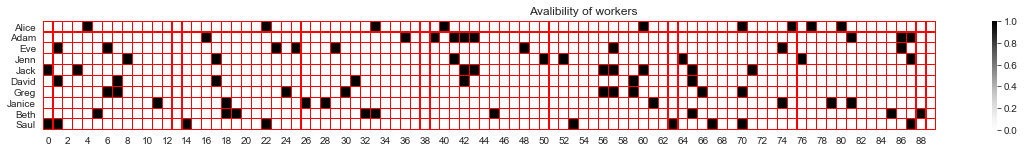

In [24]:
#Workers availability:
fig, ax = plt.subplots(figsize=(20,2))
fig.suptitle("Avalibility of workers")
plott = sns.heatmap(workers_availability_df, linewidths=0.1, linecolor='red', cmap='Greys')

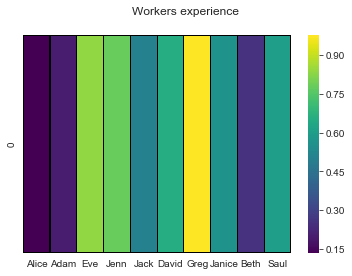

In [25]:
#Experience of every worker
fig, ax = plt.subplots()
fig.suptitle("Workers experience")
plotStartGraf = sns.heatmap(workers_experience_df, linewidths=0.1, linecolor='black', cmap='viridis')

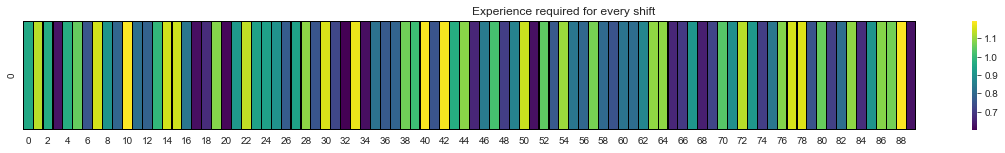

In [26]:
#Experience required on shifts
fig, ax = plt.subplots(figsize=(20,2))
fig.suptitle("Experience required for every shift")
plotStartGraf = sns.heatmap(shift_exp_required, linewidths=0.1, linecolor='black', cmap='viridis')

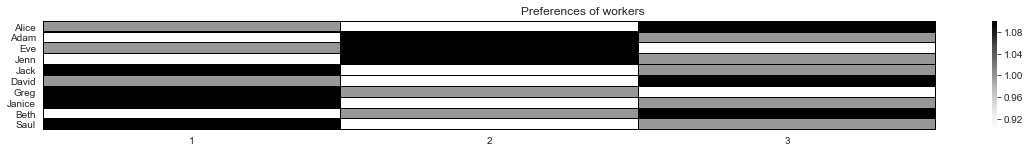

In [27]:
#Preferences
fig, ax = plt.subplots(figsize=(20,2))
fig.suptitle("Preferences of workers")
plotPref = sns.heatmap(workers_preferences_df.loc[:,1:3], linewidths=0.1, linecolor='black', cmap = "Greys")

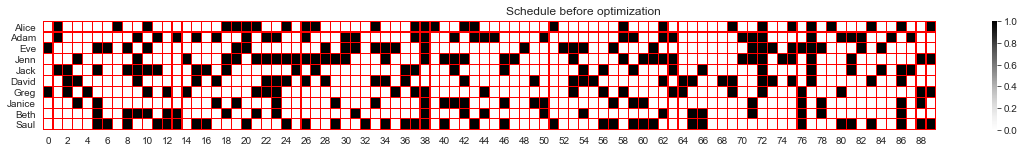

In [28]:
#Startig random schedule that will be optimized by simulated annealing. At current state starting 
#schedule has a big effect on results

fig, ax = plt.subplots(figsize=(20,2))
fig.suptitle("Schedule before optimization")
plotStartGraf = sns.heatmap(schedule_df, linewidths=0.1, linecolor='red', cmap='Greys')

In [29]:
#Here I change starting schedule to left biased, which during tests showed to give the best results

for i in range(len(schedule)):
    for j in range(len(schedule[0])):
        starting_schedule[i][j]=1
for i in range(len(schedule)):
    for j in range(20, len(schedule[0])):
        starting_schedule[i][j]=0

# Simulated annealing

In [30]:
factor=0.9
temp= 2500
iterations = 1000
eras_num = 1
iter_per_temp = 10
n=5
lin_factor = temp/L

obj_func_values = []
temp_values=[]
panalties_values=[]

best = schedule.copy()
cooling_schedule=0 #0 - factor*Tk, 1-linear cooling, temp = temp - lin_fac
counter = 0

for j in range(0,eras_num):
    
    iter_temp=[]
    iter_obj_val=[]
    
    iter_penalty=[]
    for i in range(len(estimators)):
        iter_penalty.append([])
    
    for i in range(0,iterations): 
        
        counter = counter + 1
        
        new_solution = optimize_schedule(schedule)
        delta = objective_func(new_solution, workers_availability,workers_preferences)-objective_func(schedule, workers_availability,workers_preferences)
        if delta<0:
            schedule = new_solution.copy()
        else:
            x = np.random.rand()
            if x<np.exp(-delta/temp):
                schedule = new_solution
        iter_obj_val.append(objective_func(schedule, workers_availability,workers_preferences))
        iter_temp.append(temp)
        
        for i,val in enumerate(check_penalties(schedule, workers_availability,workers_preferences)):
            iter_penalty[i].append(val)
        
        
        if counter == iter_per_temp:
            counter = 0
            if cooling_schedule==0:
                temp = (factor*temp)
            if cooling_schedule==1:
                temp = temp-lin_factor;
    #Dodanie danych
    obj_func_values.append(iter_obj_val.copy())
    temp_values.append(iter_temp.copy())
    panalties_values.append(iter_penalty.copy())
    
    if objective_func(schedule, workers_availability,workers_preferences)-objective_func(best, workers_availability,workers_preferences)<0:
        best = schedule.copy()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Badanie wyników

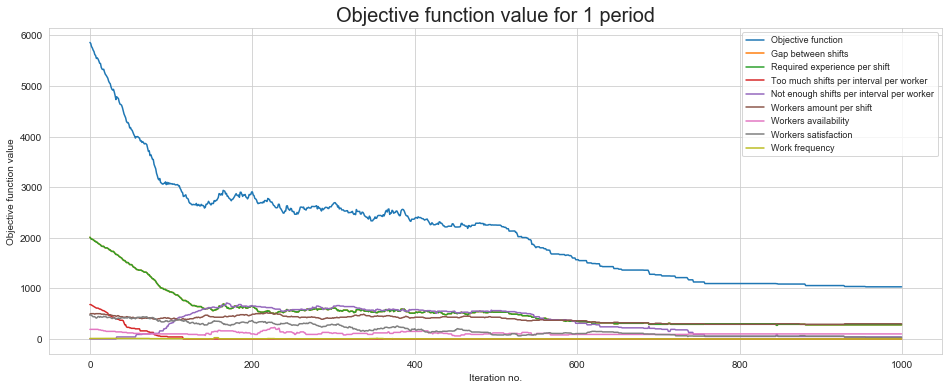

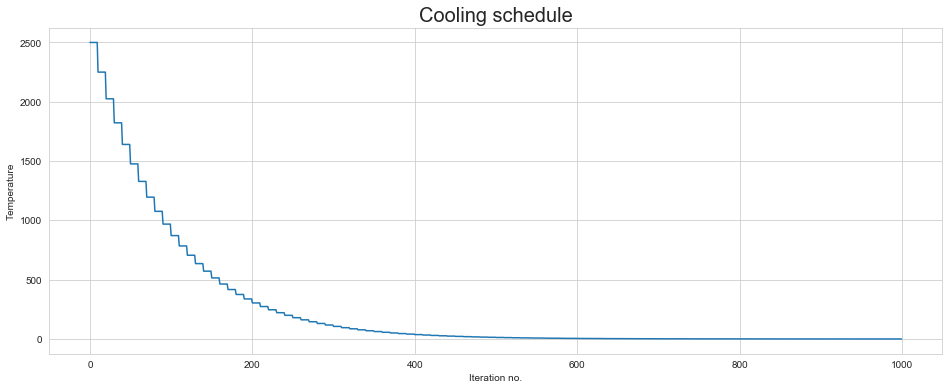

In [31]:
for i in range(nIter):
    title = "Objective function value for " + str(i+1) + " period"
    #fCeluP = pd.DataFrame(data = obj_func_values[i], index = np.arange(0, len(obj_func_values[i])))
    #fCeluP.plot(title="Wartosci funkcji celu")
    fig = plt.figure(figsize=(16,6))
    plt.plot(obj_func_values[i], label='Objective function')
    plt.title(title,fontsize=20)
    plt.xlabel("Iteration no.")
    plt.ylabel("Objective function value")
    
    for j,penalty in enumerate(panalties_values[i]):
        plt.plot(penalty, label=estimators[j])
    plt.legend(loc='best',fontsize=9)

    #tempP = pd.DataFrame(data = temp_values[i], index = np.arange(0, len(temp_values[i])))
    #tempP.plot(title="Wartosci temperatury", legend=False)
    
fig = plt.figure(figsize=(16,6))
plt.title("Cooling schedule", fontsize=20)
plt.xlabel("Iteration no.")
plt.ylabel("Temperature")
plt.plot(temp_values[i], label='Temoerature')


In [ ]:
# Nowy grafik

fig, ax = plt.subplots(figsize=(20,2))
plt.title('Optimized schedule')
sns.heatmap(schedule, linewidths=0.1, linecolor='red', cmap='Greys')

fig, ax = plt.subplots(figsize=(20,2))
plt.title('Starting schedule')
sns.heatmap(starting_schedule, linewidths=0.1, linecolor='red', cmap='Greys')



In [ ]:
#Wartość każdej kary:
penalties = check_penalties(schedule,workers_availability,workers_preferences)

print(penalties.index(max(penalties)))
print(penalties)
print(print_penalties(schedule,workers_availability,workers_preferences))

In [ ]:
#Report generator - TODO

from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Penalties', 0)

document.add_paragraph('Starting parameters:')
document.add_picture('avalibility.png')
document.add_picture('preferences.png')
document.add_picture('experience.png')



document.add_picture('pltStartGraf.png')
document.add_picture('wykresKar.png')
document.add_picture('wykresTemp.png')


document.add_paragraph(text)


name = "raport" + str(which_verison) + ".docx"
document.save(name)
which_verison = which_verison+1